In [33]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [34]:
# Read data 

df = pd.read_csv('../data.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_22296\192133345.py:3: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data.csv')


In [35]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data discovery

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [37]:
# Check the null value in each attributes

df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

# Data pre-processing

In [38]:
# total_rev_hi_lim 

# Fill missing values in total_rev_hi_lim with Simple Imputer

imputer = SimpleImputer(strategy='median')
total_rev_hi_lim = df['total_rev_hi_lim'].values.reshape(-1,1)
total_rev_hi_lim_imputed = imputer.fit_transform(total_rev_hi_lim)
df['total_rev_hi_lim'] = total_rev_hi_lim_imputed

In [39]:
# home_ownership 

# Remove rows with value ANY

df = df[df['home_ownership'] != 'ANY']
df['home_ownership'].unique()

# Level encoding for home ownership 

home_type = ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(home_type)

# Encode the 'grade' column in the DataFrame
df['home_ownership'] = encoder.transform(df['home_ownership'])


In [40]:
# Purpose 

# Label encoding for purpose

df['purpose'].unique()

purposes = ['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(purposes)
# Encode the 'grade' column in the DataFrame
df['purpose'] = encoder.transform(df['purpose'])


In [41]:
# sub_grade

# Sort the order of subgrades and do label encoding

subgrades = ['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5']

def custom_sort_key(subgrade):
    match = re.match(r'([A-Za-z]+)(\d+)', subgrade)
    letter = match.group(1)
    number = int(match.group(2))
    
    return letter, number

sorted_subgrades = sorted(subgrades, key=custom_sort_key)

# Level encoding for sorted sub-grade 

encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(sorted_subgrades)

# Encode the 'grade' column in the DataFrame
df['sub_grade'] = encoder.transform(df['sub_grade'])

In [42]:
# employment_lengths

employment_lengths = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'nan']

label_encoder = LabelEncoder()

# Fit the LabelEncoder with unique values
label_encoder.fit(employment_lengths)

# Encode the attribute values
df['emp_length'] = label_encoder.transform(df['emp_length'])

In [43]:
# mths_since_last_delinq

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(-1)

In [44]:
# mths_since_last_record

df['mths_since_last_record'] = df['mths_since_last_record'].fillna(-1)

In [45]:
# revol_util
# Handle missing value with imputer

imputer = SimpleImputer(strategy='mean')

revol_util = df['revol_util'].values.reshape(-1,1)

revol_util_imputed = imputer.fit_transform(revol_util)

df['revol_util'] = revol_util_imputed

In [46]:
# aggregate annual_inc and annual_inc_joint

df.loc[df['application_type'] == 'JOINT', 'annual_inc'] = df.loc[df['application_type'] == 'JOINT', 'annual_inc_joint']
df = df.drop('annual_inc_joint', axis=1)

In [47]:
# dti_joint

df.loc[df['application_type'] == 'JOINT', 'dti'] = df.loc[df['application_type'] == 'JOINT', 'dti_joint']
df = df.drop('dti_joint', axis=1)

In [48]:
# verification_status_joint

df.loc[df['application_type'] == 'JOINT', 'verification_status'] = df.loc[df['application_type'] == 'JOINT', 'verification_status_joint']
df = df.drop('verification_status_joint', axis=1)

In [49]:
# term 
# Label encoding for term

term = [' 36 months', ' 60 months']  # Unique values for encoding

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the grades
encoder.fit(term)

# Encode the 'grade' column in the DataFrame
df['term'] = encoder.transform(df['term'])

In [50]:
# verification_status

veri = ['Not Verified', 'Source Verified', 'Verified']  # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(veri)


df['verification_status'] = encoder.transform(df['verification_status'])

In [51]:
# pymnt_plan

plan = ['n', 'y']  # Unique values for encoding

encoder = LabelEncoder()
encoder.fit(plan)
df['pymnt_plan'] = encoder.transform(df['pymnt_plan'])

In [52]:
# application_type

type = ['INDIVIDUAL', 'JOINT'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(type)

df['application_type'] = encoder.transform(df['application_type'])

In [53]:

# initial_list_status

status = ['f', 'w'] # Unique values for encoding

encoder = LabelEncoder()

encoder.fit(status)

df['initial_list_status'] = encoder.transform(df['initial_list_status'])

In [54]:
# Drop not usable attributes 

remove_col = [
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'desc',
    'title',
    'zip_code',
    'addr_state',
    'earliest_cr_line',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'last_credit_pull_d',
    'collections_12_mths_ex_med',
    'mths_since_last_major_derog',
    'policy_code',
    'tot_coll_amt',
    'tot_cur_bal', 
    'open_acc_6m',
    'open_il_6m', 
    'open_il_12m', 
    'open_il_24m', 
    'mths_since_rcnt_il', 
    'total_bal_il', 
    'il_util', 
    'open_rv_12m' ,
    'open_rv_24m', 
    'max_bal_bc', 
    'all_util', 
    'inq_fi', 
    'total_cu_tl', 
    'inq_last_12m',
    'grade'
]

df = df.drop(remove_col, axis=1)

In [55]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,application_type,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000,5000,4975.0,0,10.65,162.87,6,1,4,24000.0,...,5831.78,5000.00,861.07,0.00,0.00,0.00,0,0,23800.0,0
1,2500,2500,2500.0,1,15.27,59.83,13,10,4,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,0,0,23800.0,1
2,2400,2400,2400.0,0,15.96,84.33,14,1,4,12252.0,...,3003.65,2400.00,603.65,0.00,0.00,0.00,0,0,23800.0,0
3,10000,10000,10000.0,0,13.49,339.31,10,1,4,49200.0,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,0,0,23800.0,0
4,3000,3000,3000.0,1,12.69,67.79,9,0,4,80000.0,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,0,0,23800.0,0


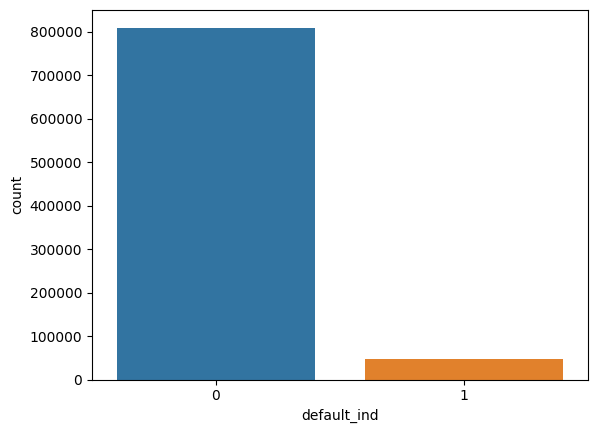

In [56]:
# Visualize default_ind attribute

sns.countplot(data=df, x='default_ind')
plt.show()

## New feature using user defined transformer

In [57]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CreditUtilizationRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, include_credit_utilization=True, include_rev_to_inc_ratio=True, include_pub_rec_ratio=True, include_loan_to_inc_ratio=True, include_repayment_progress=True, include_credit_inquiries_per_open_line=True):
        self.revol_bal_col = 'revol_bal'
        self.total_rev_hi_lim_col = 'total_rev_hi_lim'
        self.annual_inc_col = 'annual_inc'
        self.pub_rec_col = 'pub_rec'
        self.open_acc_col = 'open_acc'
        self.installment_col = 'installment'
        self.total_rec_prncp_col = 'total_rec_prncp'
        self.funded_amnt_col = 'funded_amnt'
        self.inq_last_6mths_col = 'inq_last_6mths'
        self.include_credit_utilization = include_credit_utilization
        self.include_rev_to_inc_ratio = include_rev_to_inc_ratio
        self.include_pub_rec_ratio = include_pub_rec_ratio
        self.include_loan_to_inc_ratio = include_loan_to_inc_ratio
        self.include_repayment_progress = include_repayment_progress
        self.include_credit_inquiries_per_open_line = include_credit_inquiries_per_open_line

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Find index of columns
        revol_bal_ix = np.where(X.columns == self.revol_bal_col)[0][0]
        total_rev_hi_lim_ix = np.where(X.columns == self.total_rev_hi_lim_col)[0][0]
        annual_inc_ix = np.where(X.columns == self.annual_inc_col)[0][0]
        pub_rec_ix = np.where(X.columns == self.pub_rec_col)[0][0]
        open_acc_ix = np.where(X.columns == self.open_acc_col)[0][0]
        installment_ix = np.where(X.columns == self.installment_col)[0][0]
        total_rec_prncp_ix = np.where(X.columns == self.total_rec_prncp_col)[0][0]
        funded_amnt_ix = np.where(X.columns == self.funded_amnt_col)[0][0]
        inq_last_6mths_ix = np.where(X.columns == self.inq_last_6mths_col)[0][0]

        # Calculate the Credit Utilization Ratio.
        credit_utilization_ratio = X.iloc[:, revol_bal_ix] / X.iloc[:, total_rev_hi_lim_ix]

        # Calculate the Revolving Credit Balance to Annual Income Ratio.
        rev_to_inc_ratio = X.iloc[:, revol_bal_ix] / X.iloc[:, annual_inc_ix]

        # Calculate the Derogatory Public Records Ratio.
        pub_rec_ratio = X.iloc[:, pub_rec_ix] / X.iloc[:, open_acc_ix]

        # Calculate the Loan Payment-to-Income Ratio.
        loan_to_inc_ratio = X.iloc[:, installment_ix] / (X.iloc[:, annual_inc_ix] / 12)

        # Calculate the Repayment Progress.
        repayment_progress = (X.iloc[:, total_rec_prncp_ix] / X.iloc[:, funded_amnt_ix]) * 100

        # Calculate the Number of Credit Inquiries per Open Credit Line.
        credit_inquiries_per_open_line = X.iloc[:, inq_last_6mths_ix] / X.iloc[:, open_acc_ix]

        if self.include_credit_utilization:
            # Add the calculated Credit Utilization Ratio as a new column to the input data.
            X['Credit_Utilization_Ratio'] = credit_utilization_ratio

        if self.include_rev_to_inc_ratio:
            # Add the calculated Revolving Credit Balance to Annual Income Ratio as a new column to the input data.
            X['Rev_to_Inc_Ratio'] = rev_to_inc_ratio

        if self.include_pub_rec_ratio:
            # Add the calculated Derogatory Public Records Ratio as a new column to the input data.
            X['Derogatory_Public_Records_Ratio'] = pub_rec_ratio

        if self.include_loan_to_inc_ratio:
            # Add the calculated Loan Payment-to-Income Ratio as a new column to the input data.
            X['Loan_Payment_to_Income_Ratio'] = loan_to_inc_ratio

        if self.include_repayment_progress:
            # Add the calculated Repayment Progress as a new column to the input data.
            X['Repayment_Progress'] = repayment_progress

        if self.include_credit_inquiries_per_open_line:
            # Add the calculated Number of Credit Inquiries per Open Credit Line as a new column to the input data.
            X['Credit_Inquiries_per_Open_Line'] = credit_inquiries_per_open_line

        return X


In [58]:
transformer_with_features = CreditUtilizationRatioTransformer(include_credit_utilization=True,
                                                             include_rev_to_inc_ratio=True,
                                                             include_pub_rec_ratio=True,
                                                             include_loan_to_inc_ratio=True,
                                                             include_repayment_progress=True,
                                                             include_credit_inquiries_per_open_line=True)

# Apply the transformer to add the new features to df.
transformed_data = transformer_with_features.transform(df)


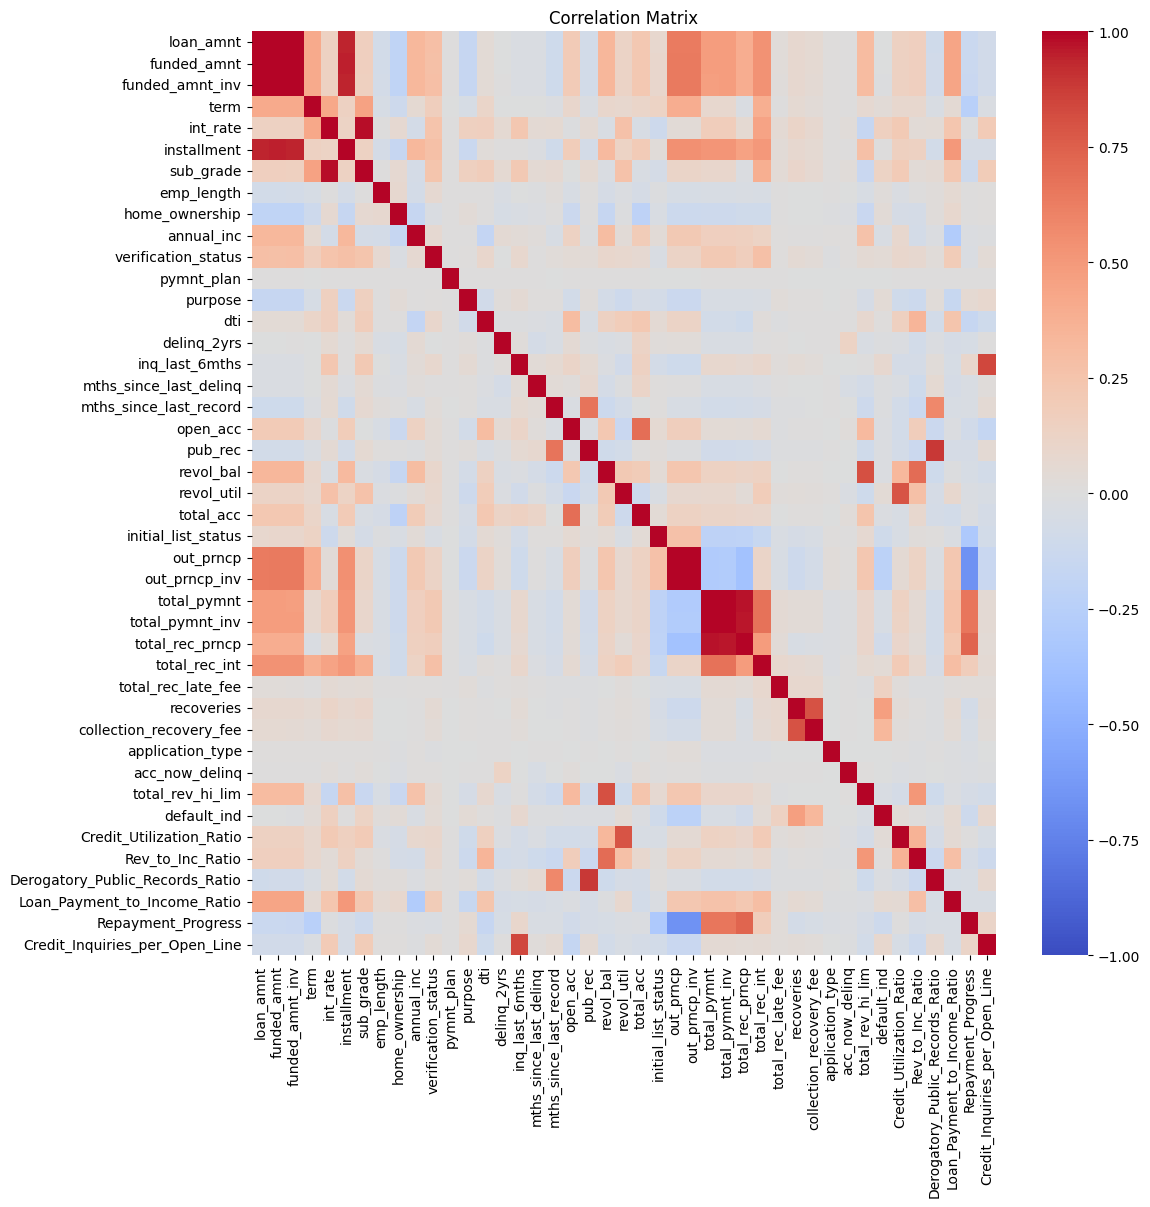

In [59]:
# Visualize - Correlation matrix

# Create a correlation matrix
corr_matrix = df.corr()

# Select the correlation values with 'default_ind'
target_corr = corr_matrix['default_ind']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show() 

# Model selection and training

In [60]:
target_corr = corr_matrix['default_ind']
target_corr_sorted = target_corr.sort_values()
print(target_corr_sorted)


out_prncp                         -0.225961
out_prncp_inv                     -0.225960
Repayment_Progress                -0.112538
initial_list_status               -0.098812
total_rec_prncp                   -0.090336
total_pymnt_inv                   -0.040233
total_pymnt                       -0.039220
total_rev_hi_lim                  -0.037429
annual_inc                        -0.037158
open_acc                          -0.021698
total_acc                         -0.021087
revol_bal                         -0.020696
pub_rec                           -0.019607
Derogatory_Public_Records_Ratio   -0.017222
mths_since_last_delinq            -0.013541
delinq_2yrs                       -0.009186
mths_since_last_record            -0.008256
funded_amnt_inv                   -0.008208
funded_amnt                       -0.005796
application_type                  -0.005446
loan_amnt                         -0.004906
acc_now_delinq                    -0.003116
pymnt_plan                      

In [61]:
# Define the features (subset of columns from the original dataset)
selected_features = ['recoveries', 'collection_recovery_fee','out_prncp','out_prncp_inv', 'Repayment_Progress', 'sub_grade']

# Create the feature matrix X by selecting the columns from the original dataset
# y for default_ind
X = df[selected_features]
y = df['default_ind']


#### StratifiedShuffleSplit Sampling

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Instantiate the StratifiedShuffleSplit object
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split and obtain the indices for training and testing sets
for train_index, test_index in stratified_shuffle_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [63]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (684772, 6)
X_test shape: (171194, 6)
y_train shape: (684772,)
y_test shape: (171194,)


#### Result of StratifiedShuffleSplit: Significantly imbalanced class distribution

Solution: Have to apply class balancing techniques (e.g. oversampling/SMOTE, or Class-Weighted approach) just before Model training



#### using SMOTE


In [64]:
'''
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Perform SMOTE only on the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
'''


'\nfrom imblearn.over_sampling import SMOTE\n\n# Instantiate the SMOTE object\nsmote = SMOTE(random_state=42)\n\n# Perform SMOTE only on the training data\nX_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)\n'

In [65]:
'''
# Before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

# After SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
'''

'\n# Before SMOTE\nprint("Class distribution before SMOTE:")\nprint(pd.Series(y_train).value_counts())\n\n# After SMOTE\nprint("Class distribution after SMOTE:")\nprint(pd.Series(y_train_balanced).value_counts())\n'

#### using Class-Weighted approach

In [66]:

from sklearn.neighbors import KNeighborsClassifier

#  set the weights parameter to 'distance'
# 'distance' means weights are assigned based on the inverse of the distance
classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Train the classifier on the training data with class weights
classifier.fit(X_train, y_train)



"\nfrom sklearn.neighbors import KNeighborsClassifier\n\n#  set the weights parameter to 'distance'\n# 'distance' means weights are assigned based on the inverse of the distance\nclassifier = KNeighborsClassifier(n_neighbors=5, weights='distance')\n\n# Train the classifier on the training data with class weights\nclassifier.fit(X_train, y_train)\n"

In [67]:

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



'\nfrom sklearn.metrics import classification_report, roc_auc_score, confusion_matrix\n\n# Make predictions on the testing data\ny_pred = classifier.predict(X_test)\n\n# Calculate evaluation metrics\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred))\n\nprint("ROC-AUC Score:", roc_auc_score(y_test, y_pred))\n\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred))\n'

# Machine Learning with Decision Tree

In [68]:
# Assuming you have already preprocessed the data and split it into X_train, X_test, y_train, y_test

# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)  # Set max_depth as an example, tune other hyperparameters as needed

# Train the model
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9981541409161536
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    161901
           1       0.99      0.98      0.98      9293

    accuracy                           1.00    171194
   macro avg       0.99      0.99      0.99    171194
weighted avg       1.00      1.00      1.00    171194



# Fine tune the model

# Eveluate the outcome